# Evaluating a classification model

## Review of model evaluation

- Need a way to choose between models: different model types, tuning parameters, and features
- Use a **model evaluation procedure** to estimate how well a model will generalize to out-of-sample data
- Requires a **model evaluation metric** to quantify the model performance

### Model evaluation procedures

- **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
- **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split
    
### Model evaluation metrics

- **Regression problems:**
    - Mean Absolute Error
    - Mean Squared Error
    - Root Mean Squared Error
- **Classification problems:**
    - Classification accuracy

## Classification accuracy is not enough
When you build a model for a classification problem the number of correct predictions from all predictions made is known as the classification accuracy. This metric alone it is alone is typically **not enough information to decide** whether or not your trained model is a good enough model to solve your problem. [Source](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)

Imagine we are trying to classify tumors as benign or malignants. Of the 100 tumor examples, 90 are benign and 10 are malignant. While 90% accuracy may seem good at first glance, it could mean that the model correctly identifies 90 tumors as benign but misses all the malignants. Although 90/100 correct predictions is a nice number, 10 out of 10 malignancies go undiagnosed, so our not so long ago good model **in reality is a bad model**. [Source](https://developers.google.com/machine-learning/crash-course/classification/accuracy)

Classification accuracy can **hide the detail you need to diagnose the performance** of your model. But thankfully we can tease apart this detail by using a confusion matrix. [Source](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)

## Confusion Matrix
- A confusion matrix is a **summary of prediction results** on a classification problem.
- The number of correct and incorrect predictions are summarized with count values and broken down by each class in a **table with 4 different combinations of predicted and actual values**.
- It gives you insight not only into the errors being made by your classifier but more importantly the **types of errors that are being made**. [Source](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

![Small confusion matrix](https://cdn-images-1.medium.com/max/800/1*Z54JgbS4DUwWSknhDCvNTQ.png)

**Basic terminology**

- **True Positive (TP):**
    - Interpretation: You predicted **positive** and it’s **true**.
    - Example: You predicted that a woman **is** pregnant and she actually **is**.
- **True Negative (TN):**
    - Interpretation: You predicted **negative** and it’s **true**.
    - You predicted that a man **is not** pregnant and he actually **is not**.
- **False Positive (FP):**
    - Interpretation: You predicted **positive** and it’s **false** (a "Type 1 Error").
    - You predicted that a man **is** pregnant but he actually **is not**.
- **False Negative (FN):** 
    - Interpretation: You predicted **negative** and it’s **false** (a "Type 2 Error").
    - You predicted that a woman **is not** pregnant but she actually **is**. 
[Source](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

### Confusion matrix example
Let's predict the diabetes status of a patient given their health measurements using the [Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database), originally from the UCI Machine Learning Repository.

In [1]:
# import pandas
import pandas as pd

# set the path
path = 'data/pima-indians-diabetes.data'

# create a list for the column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# read the data into a pandas DataFrame
pima = pd.read_csv(path, header=None, names=col_names)

In [2]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Define X and y

# create a Python list of feature names
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']

# use the list to select a subset of the original DataFrame
X = pima[feature_cols]

# select a Series from the DataFrame
y = pima.label

In [4]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# train a logistic regression model on the training set

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()

# fit the model to the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [7]:
# import metrics module
from sklearn import metrics

# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.6927083333333334

**Confusion matrix:** table that describes the performance of a classification model

In [9]:
# IMPORTANT: first argument is true values, second argument is predicted values
metrics.confusion_matrix(y_test, y_pred_class)

[[118  12]
 [ 47  15]]


**Break down**
- **TP: 118**
    - Predicted that a person **has** diabetes and she actually **has**.
- **TN: 15**
    - Predicted that a person **hasn't** diabetes and she actually **hasn't**.
- **FP: 12**
    - Predicted that a person **has** diabetes and she actually **hasn't**.
- **FN: 47** 
    - Predicted that a person **hasn't** diabetes and she actually **has**.

## Metrics computed from a confusion matrix
A confusion matrix is extremely useful for measuring the following metrics: **Accuracy**, **Precision**, **Recall**, **Specificity**, and most importantly **AUC-ROC Curve**. [Source](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

**Classification Accuracy:** What fraction of predictions got right our model?

In [10]:
metrics.accuracy_score(y_test, y_pred_class)

0.6927083333333334

**Precision:** What proportion of positive identifications was actually correct?

In [11]:
metrics.precision_score(y_test, y_pred_class)

0.5555555555555556

**Recall** (also called **true positive rate**): What proportion of actual positives was identified correctly?

In [13]:
metrics.recall_score(y_test, y_pred_class)

0.24193548387096775

**Specificity** (also called **true negative rate**): What proportion of actual positives was identified correctly?

In [ ]:
metrics.f1_score(y_test, y_pred_class)

A **ROC curve** (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 
- ROC curves typically feature True Positive Rate **(TPR) on the Y axis**, and False Positive Rate **(FPR) on the X axis**. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one.
- The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

In [19]:
# ROC curve uses the estimates of the positive class to plot the True Positive Rate and True Negative Rate

# return estimates for all classes ordered by label: ['index 0 is negative', 'index 1 is positive'].
logreg.predict_proba(X_test)[:5,:] # [5 rows, all columns]

# by default predicts True if estimate >= 0.5 (treshhold == 0.5)

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [ ]:
# store the probability estimates of the positive class
y_pred_prob = logreg.predict_proba(X_test)[:, 1] # [all rows, index 1 column]

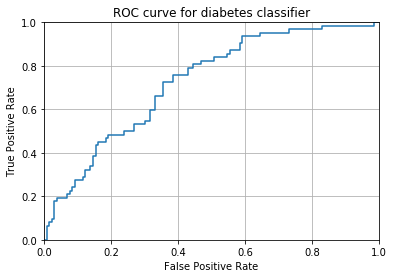

In [22]:
# import matplotlib
import matplotlib.pyplot as plt

# allow plots to appear in the notebook
%matplotlib inline

# store the three arrays that are returned when ROC curve is computed: FPR, TPR and treshholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob) # args: (true values, predicted probabilities)

# plot FPR TPR
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

The **Area Under the Curve (AUC)** is the percentage of the ROC plot that is underneath the curve. It's THE metric we consider of this curve: a larger AUC is usually better.
- AUC is useful as a **single number summary** of classifier performance.

In [21]:
# compute AUC
metrics.roc_auc_score(y_test, y_pred_class)

0.5748138957816378

In [42]:
# import cross validation function
from sklearn.model_selection import cross_val_score

# calculate cross-validated AUC
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean() # scoring='roc_auc'

0.7378233618233618

## Tresholding

In order to map a probability estimate to a binary category, you must define a **classification threshold**. A value above that threshold indicates "True"; a value below indicates "False". It is tempting to assume that the classification threshold should always be 0.5, but thresholds are **problem-dependent**, and are therefore values that you must tune.

We can use the metrics we have seen so far to evaluate a classification model's predictions, as well as the impact of changing the classification threshold on these predictions.

Part of choosing a threshold is assessing **how much you'll suffer for making a mistake**. For example, mistakenly labeling a non-spam message as spam is very bad. However, mistakenly labeling a spam message as non-spam is unpleasant, but hardly the end of your job. [Source](https://developers.google.com/machine-learning/crash-course/classification/thresholding)

In [32]:
# DECREASE THE TRESHOLD

# storing previous confusion matrix for comparison
old_confusion = metrics.confusion_matrix(y_test, y_pred_class)

# importing tresholding function
from sklearn.preprocessing import binarize

# predict diabetes if the predicted probability is greater than 0.3
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [33]:
# previous confusion matrix (default threshold of 0.5)
old_confusion

array([[80, 50],
       [16, 46]])

In [34]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


**Break down**
- **TP: 80**
    - Predicted that a person **has** diabetes and she actually **has**.
- **TN: 46**
    - Predicted that a person **hasn't** diabetes and she actually **hasn't**.
- **FP: 50**
    - Predicted that a person **has** diabetes and she actually **hasn't**.
- **FN: 16** 
    - Predicted that a person **hasn't** diabetes and she actually **has**.

In [35]:
# Classification Accuracy: What fraction of predictions got right our model?
# old accuracy: 0.6927083333333334
metrics.accuracy_score(y_test, y_pred_class)

0.65625

In [36]:
# Precision: What proportion of positive identifications was actually correct?
# old precision: 0.5555555555555556
metrics.precision_score(y_test, y_pred_class)

0.4791666666666667

In [37]:
# Recall (true positive rate): What proportion of actual positives was identified correctly?
# old recall: 0.24193548387096775
metrics.recall_score(y_test, y_pred_class)

0.7419354838709677

In [ ]:
# Specificity (also called true negative rate): What proportion of actual positives was identified correctly?
# old:
metrics.f1_score(y_test, y_pred_class)

In [38]:
# old AUC: 0.5748138957816378
metrics.roc_auc_score(y_test, y_pred_class)

0.6786600496277917